<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Assumptions_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# create the data

X,y = make_regression(n_samples=300,n_features=10,
                      n_informative=7,noise=30,
                      random_state=87)

print('The shape of X is ',X.shape)
print('The shape of y is ',y.shape)

The shape of X is  (300, 10)
The shape of y is  (300,)


## Assumptions of Linear Regression

In [ ]:
# do the train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

print('The shape of X_train is',X_train.shape)
print('The shape of the X_test is',X_test.shape)

The shape of X_train is (240, 10)
The shape of the X_test is (60, 10)


In [ ]:
# fit the linear regression of the model

lr = LinearRegression()

# fit the model
lr.fit(X_train,y_train)

# do the predictions
y_pred = lr.predict(X_test)

In [ ]:
# calculate the residuals

resid = y_test - y_pred

#### Linear relationship among inputs and output

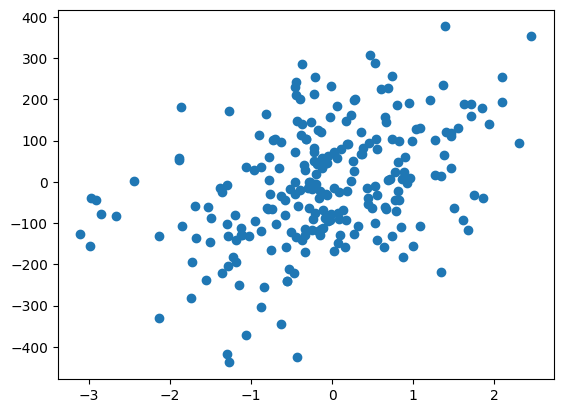

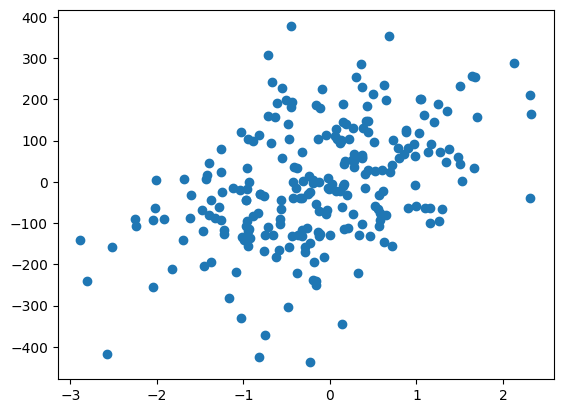

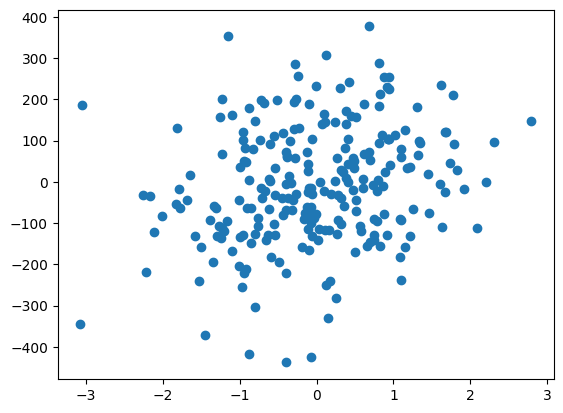

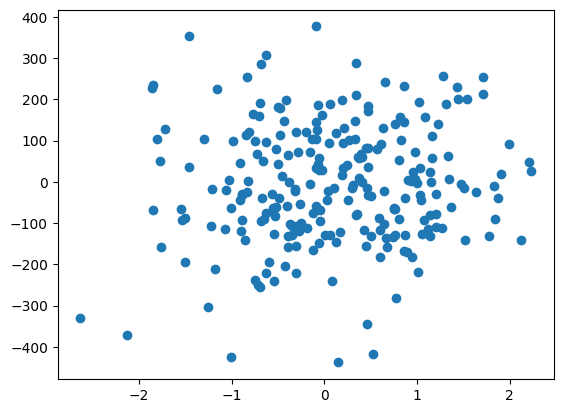

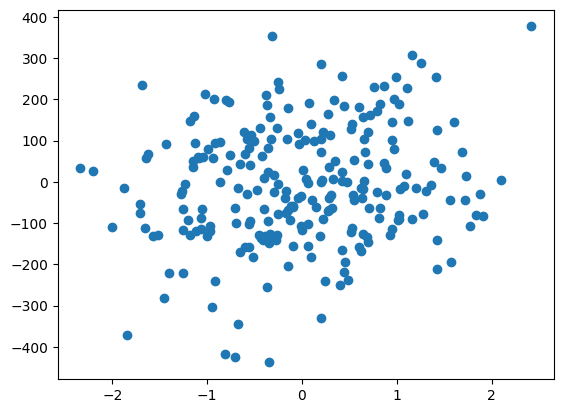

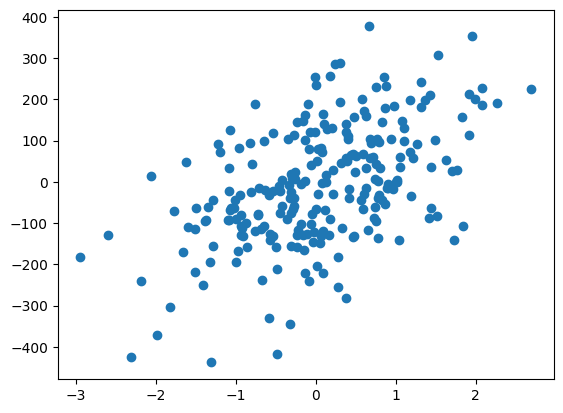

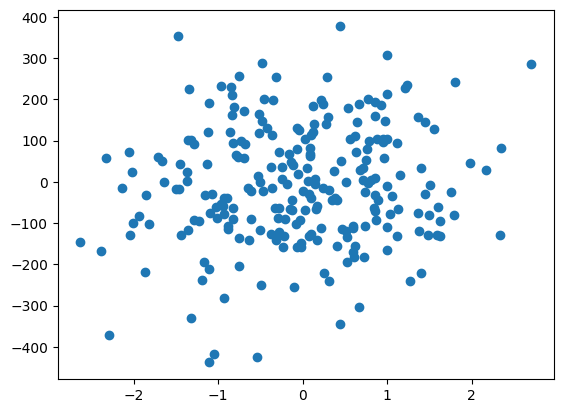

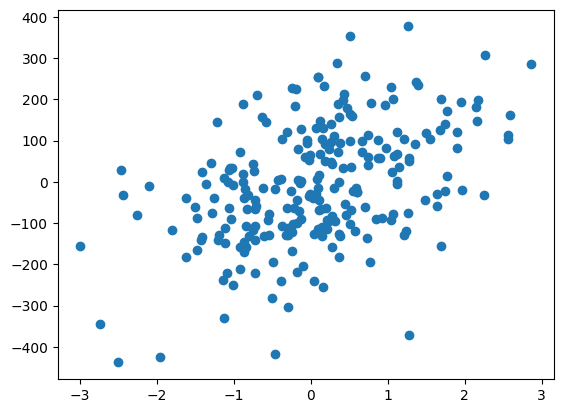

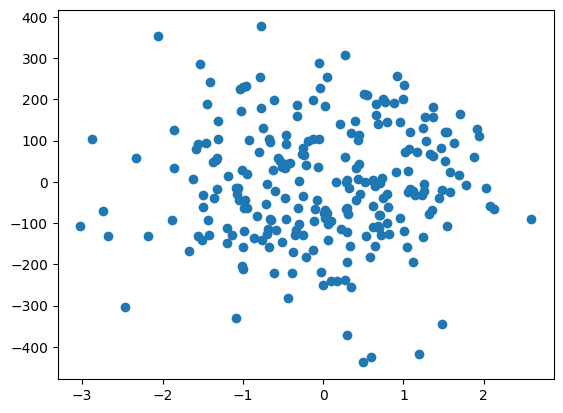

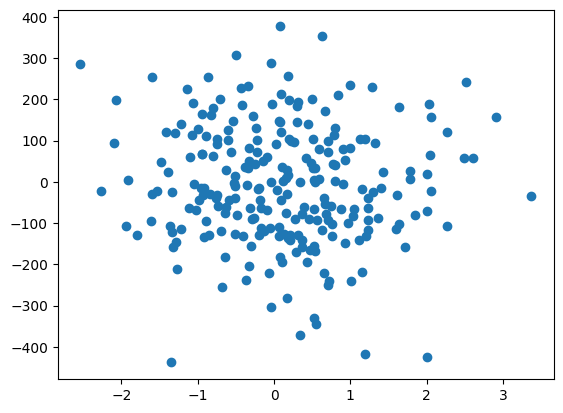

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(10):
    plt.scatter(X_train[:,i],y_train)
    plt.show()

**The input columns show a linear relationship to the output variable.**

In [ ]:
# check for correlation among the input and the target column

# concat the data

df = pd.concat([pd.DataFrame(X_train),pd.Series(y_train,name='y')],axis=1)

df.corr()['y']

0    0.414996
1    0.432957
2    0.237157
3    0.086022
4    0.165109
5    0.510165
6    0.121144
7    0.453092
8    0.028608
9   -0.061322
y    1.000000
Name: y, dtype: float64

### No Multicollinearity among the input columns

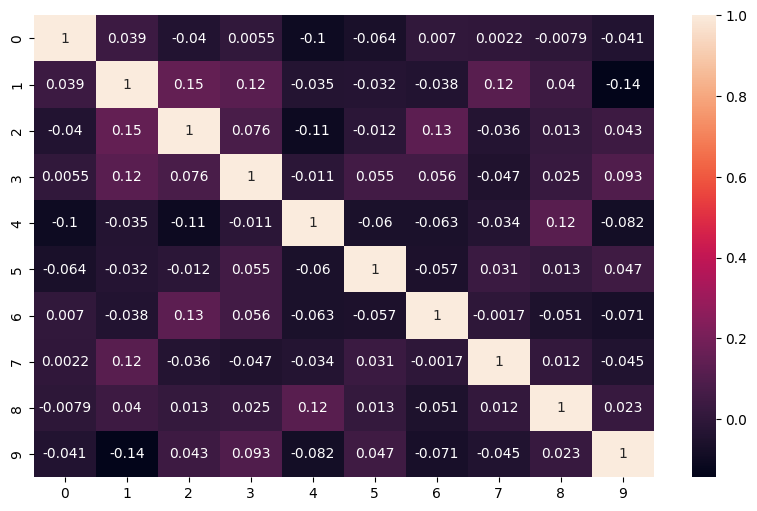

In [ ]:
# plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(X_train).corr(),annot=True)
plt.show()

**There is no correlation among the input columns which shows that there is no multicollinearity**

In [ ]:
# check for VIF

vif = []
X_train_temp = pd.DataFrame(X_train)
for i in range(10):
    vif.append(variance_inflation_factor(X_train_temp,i))

pd.DataFrame(data={'vif':vif},index=range(10))

,vif
0,1.024116
1,1.094145
2,1.067248
3,1.039854
4,1.056664
5,1.022402
6,1.042050
7,1.020474
8,1.020631
9,1.067339


**The VIF is below 5 for every column which shows that there is no multicollinearity among the input columns.**

### Normality of Residuals

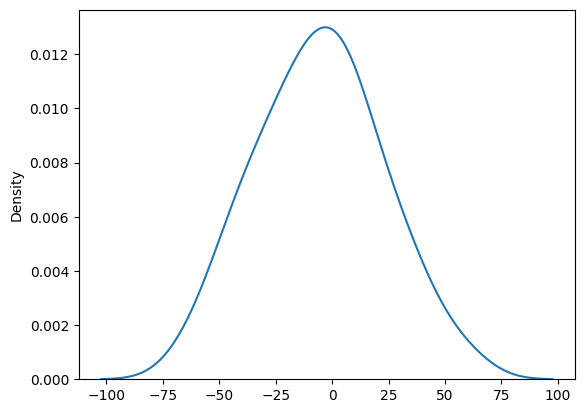

In [ ]:
# plot the kde plot

sns.kdeplot(resid)
plt.show()

**The kdeplot of the residuals appear to be normally distributed**

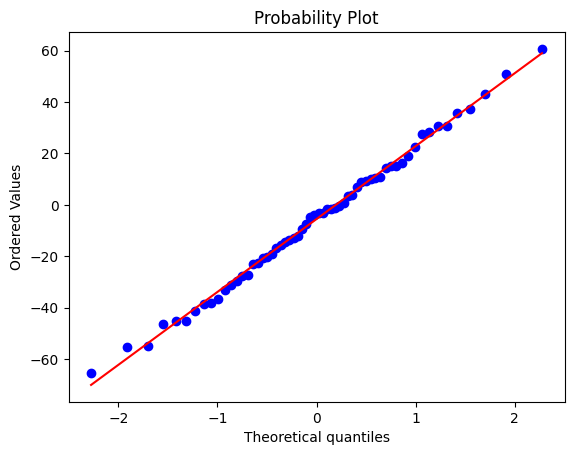

In [ ]:
# plot QQ plot
from scipy.stats import probplot

probplot(x=resid,dist='norm',plot=plt)
plt.show()

**Almost all the points appears to be on the diagonal line which shows that the residuals are normally distributed**

### Homoscedasticity of residuals

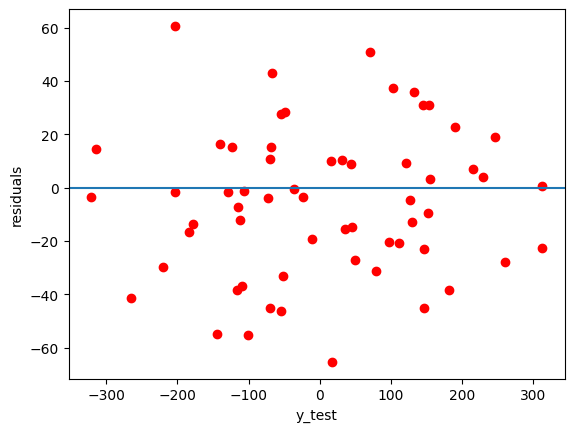

In [ ]:
# plot the scatter plot

plt.scatter(y_pred,resid,c='red')
plt.axhline(y=0,linestyle='-')
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.show()

**There is no pattern in the graph which shows the Homoscedasticity of the residuals**

### 5. Autocorrelation of residuals

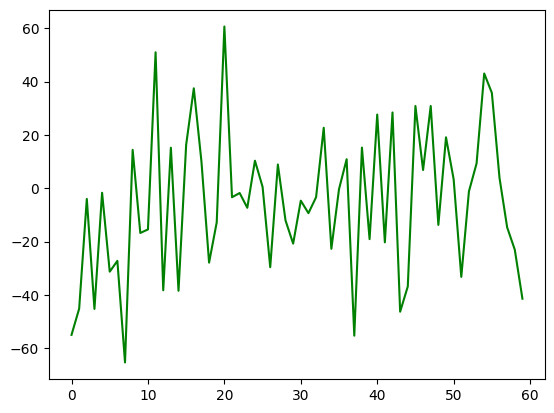

In [ ]:
# plot the line plot
plt.plot(resid,color='green')
plt.show()

**The residuals does not show any specific pattern which shows that there is no autocorrelation among the residuals**

> All the Assumptions of the Linear Regression holds `True`    
and we can perform Linear Regression on this data.